<a href="https://colab.research.google.com/github/Santt89/Proyecto_provincias_Argentina/blob/main/Proyecto_provincias_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1**

# **Fundamentos de Ciencia de Datos**

En primer lugar importamos las librerias necesarias para realizar nuestro análisis.

In [1]:
import pandas as pd
import numpy as np
from google.colab.data_table import DataTable
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el csv: `provicias_datos_2022.csv`

Para cargarlo le especificamos a la función **read_csv** de la libreria Pandas los siguientes argumentos:

*   Nombre del archivo a leer = 'provicias_datos_2022.csv'
*   delimiter = ' ; ' : Aqui establecemos que los delimitadores entre los datos seran ;
*   Header = 3 : Aqui establecemos que el encabezado comienze en el renglon 3, ya que luego de ver el conjunto de datos, nos dimos cuenta que la informacion comienza en dicho renglon.



In [2]:
prov = pd.read_csv('provicias_datos_2022.csv' , delimiter = ';' , header = 3)

In [3]:
DataTable(prov)

,PROVINCIa,población (miles),hogares (miles),ingresos laborales (miles pesos),tasa de empleo (%),superficie (km2),exportaciones (mill usd)
0,Ciudad Autónoma de Buenos Aires,3.004,1.263,211.877.384,"4,7","205,9","311,163"
1,Buenos Aires,17.292,5.738,623.250.917,"8,7","305.907,40","33024,657"
2,Catamarca,336.000,102.000,8.460.986,"7,3","101.486,10","201,03"
3,Chaco,3.477,1.251,122.790.341,"6,5","99.763,30","516,336"
4,Chubut,967.000,287.000,24.733.558,"5,3","224.302,30","2575,372"
5,Córdoba,1.044,321.000,22.744.468,"2,6","164.707,80","12851,979"
6,Corrientes,591.000,205.000,30.606.036,"3,6","89.123,30","273,185"
7,Entre Ríos,1.252,431.000,40.510.249,"6,4","78.383,70","1911,902"
8,Formosa,509.000,148.000,9.586.123,"3,3","75.488,30","40,614"
9,Jujuy,696.000,197.000,17.044.750,"5,1","53.244,20","873,44"


Visualizamos mediante dtypes los tipos de datos que se encuentran en el DataFrame

In [4]:
prov.dtypes

PROVINCIa                            object
población (miles)                   float64
hogares (miles)                     float64
ingresos laborales (miles pesos)     object
tasa de empleo (%)                   object
superficie (km2)                     object
exportaciones (mill usd)             object
dtype: object

Comenzaremos a realizar las tareas de limpieza, transformación y normalización de los datos de nuesto DataFrame

En primer lugar, veremos la cantidad de valores nulos que se encuentran en el DataFrame

In [5]:
prov.isna().sum()

PROVINCIa                           0
población (miles)                   1
hogares (miles)                     0
ingresos laborales (miles pesos)    1
tasa de empleo (%)                  0
superficie (km2)                    0
exportaciones (mill usd)            0
dtype: int64

Visualizando el DF nos podemos dar cuenta de la ubicacion de los mismos.

In [6]:
prov.iloc[18,1]

nan

In [7]:
prov.iloc[15,3]

nan

Vimos que en el DataFrame se utiliza el punto '.' como separador de miles, pero pandas entiende al punto como decimal.

Por lo tanto, lo que haremos ahora es modificar aquellas columnas que utilizan al punto como separador de miles.

Observando el DF nos dimos cuenta que las columnas afectadas por lo nombrado anteriormente son:

*   población (miles)
*   hogares (miles)
*   ingresos laborales (miles pesos)

Lo que haremos a continuación, sera quitarle los puntos en sus campos.








En primer lugar modificaremos el tipo de datos de las columnas, pasandolas a String.

Solo modificaremos las columnas población (miles) y hogares (miles) ya que son las unicas que no se encuentran en tipo de dato String (object en Pandas)

In [8]:
prov['población (miles)'] = prov['población (miles)'].astype(str)
prov['hogares (miles)'] = prov['hogares (miles)'].astype(str)

Verificamos que se haya modificado el tipo de dato

In [9]:
prov.dtypes

PROVINCIa                           object
población (miles)                   object
hogares (miles)                     object
ingresos laborales (miles pesos)    object
tasa de empleo (%)                  object
superficie (km2)                    object
exportaciones (mill usd)            object
dtype: object

Utilizando la funcion `str.replace` reemplazamos los puntos '.' por espacios vacios, ya que no utilizaremos separadores para los numeros muy grandes.

In [10]:
prov['población (miles)'] = prov['población (miles)'].str.replace('.' , '')
prov['hogares (miles)'] = prov['hogares (miles)'].str.replace('.' , '')
prov['ingresos laborales (miles pesos)'] = prov['ingresos laborales (miles pesos)'].str.replace('.' , '')

<ipython-input-10-3fb636009b89>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prov['población (miles)'] = prov['población (miles)'].str.replace('.' , '')
<ipython-input-10-3fb636009b89>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prov['hogares (miles)'] = prov['hogares (miles)'].str.replace('.' , '')
<ipython-input-10-3fb636009b89>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prov['ingresos laborales (miles pesos)'] = prov['ingresos laborales (miles pesos)'].str.replace('.' , '')


In [11]:
prov.head()

,PROVINCIa,población (miles),hogares (miles),ingresos laborales (miles pesos),tasa de empleo (%),superficie (km2),exportaciones (mill usd)
0,Ciudad Autónoma de Buenos Aires,3004,1263,211877384,"4,7","205,9","311,163"
1,Buenos Aires,17292,5738,623250917,"8,7","305.907,40","33024,657"
2,Catamarca,3360,1020,8460986,"7,3","101.486,10","201,03"
3,Chaco,3477,1251,122790341,"6,5","99.763,30","516,336"
4,Chubut,9670,2870,24733558,"5,3","224.302,30","2575,372"


Ahora, debemos solucionar los valores NaN.
Nuestra idea para llenar estos campos es hacer una interpolación lineal.
Para hacer esto, necesitamos pasar la columna nuevamente a tipo de dato numerico, pero Python nos arrojará un error por los datos NaN.
Como solución, decidimos reemplazar los NaN por un numero arbitrario (elegimos el 0 ya que sabemos que ninguna casilla de nuestro df es 0) para poder pasar las columnas a tipo de dato numerico.

Comenzaremos reemplazando los valores NaN por 0.

In [12]:
prov.iloc[18,1] = '0'
prov.iloc[15,3] = '0'

Verificamos que se hayan modificado los valores.

In [13]:
prov.iloc[18,1]

'0'

In [14]:
prov.iloc[15,3]

'0'

Luego, pasamos las columnas a entero.

In [15]:
prov['población (miles)'] = prov['población (miles)'].astype(int)
prov['hogares (miles)'] = prov['hogares (miles)'].astype(int)
prov['ingresos laborales (miles pesos)'] = prov['ingresos laborales (miles pesos)'].astype(int)

In [16]:
prov.dtypes

PROVINCIa                           object
población (miles)                    int64
hogares (miles)                      int64
ingresos laborales (miles pesos)     int64
tasa de empleo (%)                  object
superficie (km2)                    object
exportaciones (mill usd)            object
dtype: object

Por ultimo, multiplicaremos 2 de las columnas nombradas anteriormente por 1000. Haremos esto ya que el nombre de cada una de ellas especifica que estan en miles y ademas cambiaremos los nombres de las columnas. Nosotros haciendo esto queremos que nos quede el numero final en nuestro DataFrame.

In [17]:
prov['población (miles)'] = prov['población (miles)'] * 1000
prov['hogares (miles)'] = prov['hogares (miles)'] * 1000

Ahora, haremos la interpolación lineal en los campos mencionados anteriormente.

In [18]:
# Reemplazamos el valor cero por NaN para realizar la interpolación
prov['población (miles)'] = prov['población (miles)'].replace(0, np.nan)
prov['ingresos laborales (miles pesos)'] = prov['ingresos laborales (miles pesos)'].replace(0, np.nan)

prov['población (miles)'] = prov['población (miles)'].interpolate()
prov['ingresos laborales (miles pesos)'] = prov['ingresos laborales (miles pesos)'].interpolate()

Podemos notar que al aplicar la interpolación se nos modificó el tipo de dato, lo modificaremos nuevamente a entero.

In [19]:
prov['población (miles)'] = prov['población (miles)'].astype(int)
prov['ingresos laborales (miles pesos)'] = prov['ingresos laborales (miles pesos)'].astype(int)

Por ulitmo, visualizaremos como quedaron los cambios.

In [20]:
DataTable(prov)

,PROVINCIa,población (miles),hogares (miles),ingresos laborales (miles pesos),tasa de empleo (%),superficie (km2),exportaciones (mill usd)
0,Ciudad Autónoma de Buenos Aires,3004000,1263000,211877384,"4,7","205,9","311,163"
1,Buenos Aires,17292000,5738000,623250917,"8,7","305.907,40","33024,657"
2,Catamarca,3360000,1020000,8460986,"7,3","101.486,10","201,03"
3,Chaco,3477000,1251000,122790341,"6,5","99.763,30","516,336"
4,Chubut,9670000,2870000,24733558,"5,3","224.302,30","2575,372"
5,Córdoba,1044000,3210000,22744468,"2,6","164.707,80","12851,979"
6,Corrientes,5910000,2050000,30606036,"3,6","89.123,30","273,185"
7,Entre Ríos,1252000,4310000,40510249,"6,4","78.383,70","1911,902"
8,Formosa,5090000,1480000,9586123,"3,3","75.488,30","40,614"
9,Jujuy,6960000,1970000,17044750,"5,1","53.244,20","873,44"


A continuación, trabajaremos con las ultimas 3 columnas, las mismas son:


*  tasa de empleo (%)
*  superficie (km2)
*  exportaciones (mill usd)

A las que les realizaremos las siguientes modificaciones:

A `tasa de empleo (%)` le reemplazaremos la ',' por el '.'

A `superficie (km2)` le reemplazaremos el '.' por '' (espacio vacio) y la ',' por el '.'

A `exportaciones (mill usd)` le reemplazaremos la ',' por el '.'

En muchas ocasiones reemplzamos la coma (,) por el punto (.) esto se debe a que Pandas interpreta el punto como decimal. Y luego de relizar esto, pasamos el tipo de dato de la columna a numerico.



In [21]:
prov['tasa de empleo (%)'] = prov['tasa de empleo (%)'].str.replace(',' , '.')
prov['tasa de empleo (%)'] = prov['tasa de empleo (%)'].astype(float)

prov['superficie (km2)'] = prov['superficie (km2)'].str.replace('.' , '').str.replace(',' , '.')
prov['superficie (km2)'] = prov['superficie (km2)'].astype(float)

prov['exportaciones (mill usd)'] = prov['exportaciones (mill usd)'].str.replace(',' , '.')
prov['exportaciones (mill usd)'] = prov['exportaciones (mill usd)'].astype(float)


<ipython-input-21-cd95f2779dbb>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prov['superficie (km2)'] = prov['superficie (km2)'].str.replace('.' , '').str.replace(',' , '.')


Por ulitmo, modificamos el nombre de los encabezados de las columas ya que en el mismo especificaba que estaba en miles, y nosotros al multiplicarla por 1000 ya nos queda el numero final en las columnas.

Además, modificamos los nombres para que esten todos en minuscula y  quitamos los parentesis y especios reemplazandolos por '_'

Tambien, establecemos a la columna provincia como indice de nuestro DF.

In [22]:
prov = prov.rename(columns={'población (miles)':'poblacion','hogares (miles)':'hogares'} )
prov = prov.rename(str.lower, axis="columns")

prov.columns = prov.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')','')
prov.set_index('provincia', inplace=True)

<ipython-input-22-f881b791e123>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prov.columns = prov.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')','')
<ipython-input-22-f881b791e123>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prov.columns = prov.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')','')


Visualizamos los cambios

In [23]:
DataTable(prov)

,poblacion,hogares,ingresos_laborales_miles_pesos,tasa_de_empleo_%,superficie_km2,exportaciones_mill_usd
provincia,,,,,,
Ciudad Autónoma de Buenos Aires,3004000,1263000,211877384,4.7,205.9,311.163
Buenos Aires,17292000,5738000,623250917,8.7,305907.4,33024.657
Catamarca,3360000,1020000,8460986,7.3,101486.1,201.030
Chaco,3477000,1251000,122790341,6.5,99763.3,516.336
Chubut,9670000,2870000,24733558,5.3,224302.3,2575.372
Córdoba,1044000,3210000,22744468,2.6,164707.8,12851.979
Corrientes,5910000,2050000,30606036,3.6,89123.3,273.185
Entre Ríos,1252000,4310000,40510249,6.4,78383.7,1911.902
Formosa,5090000,1480000,9586123,3.3,75488.3,40.614


Una vez terminado el trabajo de curado de los datos. Trabajaremos con las variables, comenzaremos visualizando las mismas a través de distintos gráficos, para poder comprender su comportamiento y estudiarlas.
Tambien asi podremos visualizar si los datos tienen sentido y si hay algun dato llamativo o erroneo.

Comenzaremos visualizando la variable `poblacion`. Lo haremos a traves de un Boxplot.

Usaremos la libreria `matplotlib.pyplot`

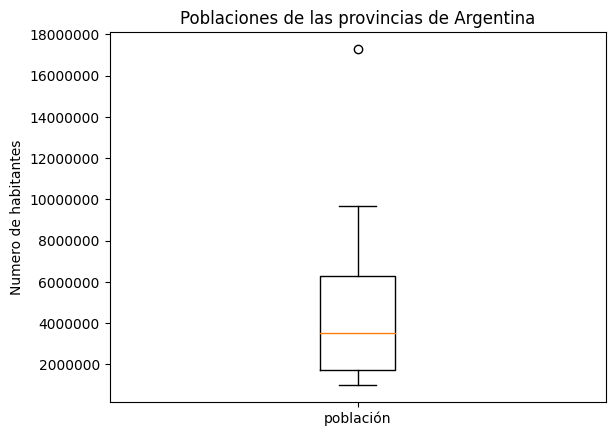

In [24]:
plt.boxplot(prov['poblacion'])
plt.xticks([1], ['población'])
plt.ylabel('Numero de habitantes')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Poblaciones de las provincias de Argentina')

plt.show()

**Aclaración:**
Cada vez que hagamos referencia a población, nos estamos refiriendo a la población de alguna de las porvincias de Argentina.

Mediante este grafico de caja y bigotes, podemos observar bastantes datos interesantes de la poblacion, algunos de ellos son:

*   La población **mínima** está por debajo de los 2 millones de habitantes.
*   La población **máxima** (sin contar el valor atípico) es de aproximadamente 10
millones de habitantes.
*   **El 25%** de las poblaciones tienen menos de aproximadamente 2 millones de habitantes.
*   **El 75%** de las poblaciones tienen menos de aproximadamente 10 millones de habitantes.
*   Hay un solo **valor atipico** que es una población de aproximadamente 17 millones de habitantes.


El valor atípico que mencionamos anteriormente, no lo consideraremos como tal. Esto se debe, a que ese valor es de **Buenos Aires** y es un dato correcto. Solo que hay mucha diferencia entre la población de Buenos Aires con el resto de las provincias.








Verificamos que el valor atípico es el de **Buenos Aires**

In [25]:
prov.loc['Buenos Aires' , 'poblacion']

17292000

Visualizamos la variable `hogares`. Lo haremos a través de un grafico de violin.

Usaremos la libreria `matplotlib.pyplot`

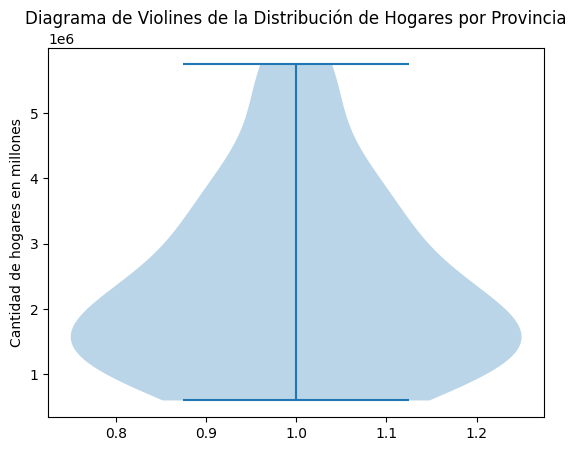

In [26]:
plt.violinplot(prov['hogares'])
plt.title('Diagrama de Violines de la Distribución de Hogares por Provincia')
plt.ylabel('Cantidad de hogares en millones')
plt.show()


plt.show()

Mediante este grafico de violin, podemos observar bastantes datos interesantes de la población, algunos de ellos son:

*   La cantidad de hogares mínima está por debajo del millon de hogares.
*   La cantidad de hogares máxima es de aproximadamente 7 millones de hogares.
*   La mayoria de las provincias tiene aproximadamente una cantidad de hogares entre 1 mill y 3 millones.


Visualizamos la variable `ingresos_laborales_miles_pesos`. Lo haremos a traves de un grafico de dispersion.

Usaremos la libreria `seaborn`

<Axes: xlabel='ingresos_laborales_miles_pesos'>

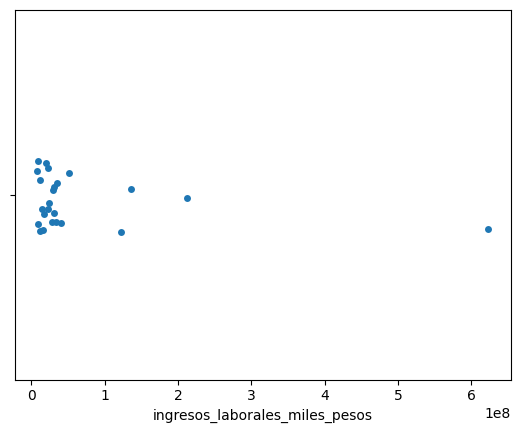

In [27]:
sns.stripplot(x = prov['ingresos_laborales_miles_pesos'], data = prov)

Si bien las etiquetas del eje x no son exactas, este grafico nos permite vizualisar de manera simple la distribucion de la variable.

Podemos observar con este grafico que la mayoria de provincias tiene un ingreso laboral similar, exepto 4 provincias que son las que sacan mas diferencia, 3 de esas 4 estan dentro de un rango considerable, y la otra es un valor atipico.

Como en el estudio de la población , el valor atípico que mencionamos anteriormente, no lo consideraremos como tal. Esto se debe, a que ese valor es de **Buenos Aires** y es un dato correcto.

Verificamos que el valor atípico es el de Buenos Aires

In [28]:
prov.loc['Buenos Aires' , 'ingresos_laborales_miles_pesos']

623250917

Visualizamos la variable `tasa_de_empleo_%`. Lo haremos a traves de un grafico de puntos.

Usaremos la libreria `matplotlib.pyplot`

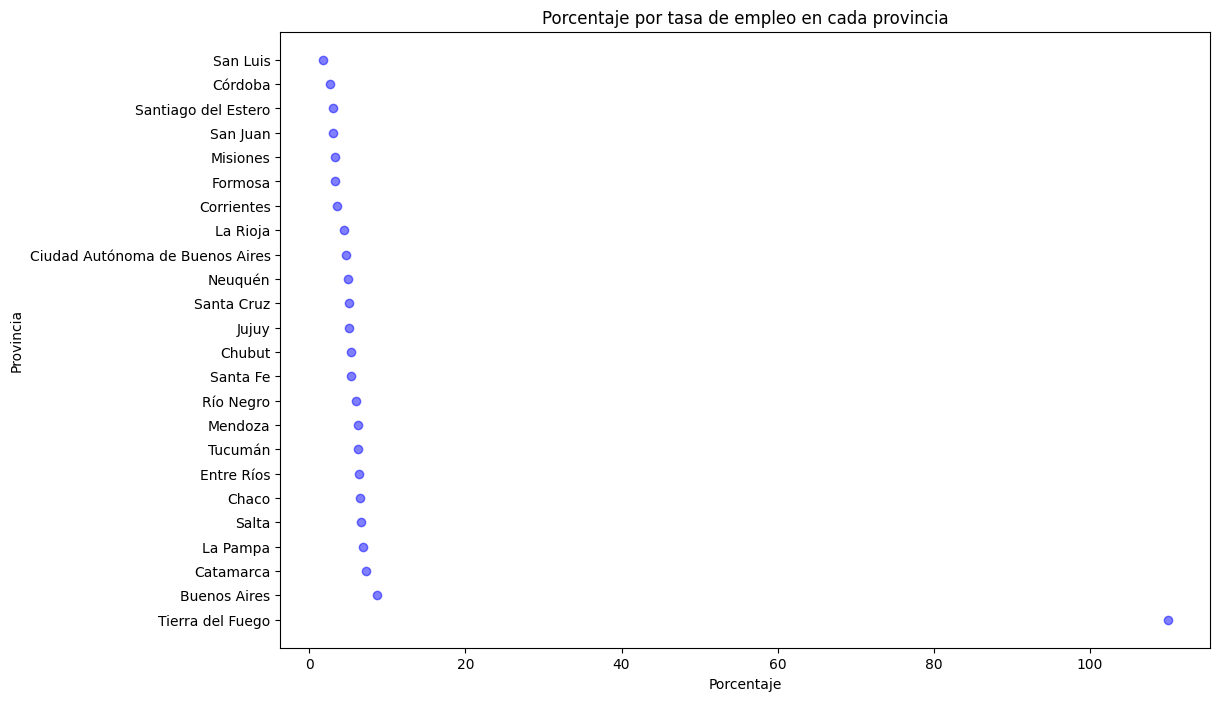

In [29]:
#Ordenamos los valores
prov_sorted = prov.sort_values('tasa_de_empleo_%', ascending=False)

plt.figure(figsize=(12, 8))
plt.scatter(prov_sorted['tasa_de_empleo_%'], prov_sorted.index, color='blue', marker='o', alpha=0.5)

plt.xlabel('Porcentaje')
plt.ylabel('Provincia')
plt.title('Porcentaje por tasa de empleo en cada provincia')

plt.show()

Claramente podemos observar que el dato de la tasa de empleo de Tierra del Fuego es erroneo. Esto puede ser debido a un error de tipeo o una confusion. Al ser un dato del que podemos saber la informacion correcta, investigamos y basandonos en informacion encontrada en la web www.tierradelfuego.gob.ar concluimos que la tasa de empleo es de 4.7 y la reemplazamos en nuestro df.

In [30]:
prov.loc["Tierra del Fuego" , "tasa_de_empleo_%"]  = 4.7

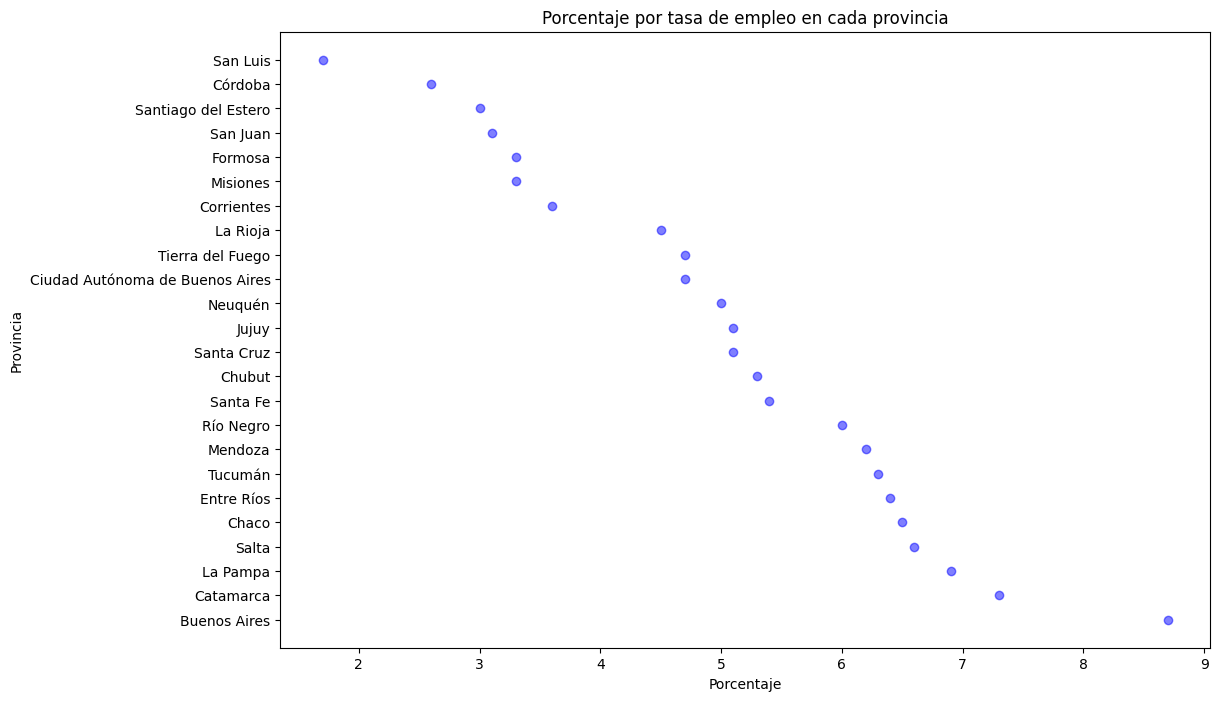

In [31]:
#Ordenamos los valores nuevamente ya que corregimos el valor erroneo.
prov_sorted = prov.sort_values('tasa_de_empleo_%', ascending=False)

plt.figure(figsize=(12, 8))
plt.scatter(prov_sorted['tasa_de_empleo_%'], prov_sorted.index, color='blue', marker='o', alpha=0.5)

plt.xlabel('Porcentaje')
plt.ylabel('Provincia')
plt.title('Porcentaje por tasa de empleo en cada provincia')

plt.show()

Ahora si, podemos observar que varia bastante la tasa de empleo entre las provincias. La provincia con tasa de empleo mas alta es **Buenos Aires** y la provincia con tasa de empleo mas baja es **San Luis**.

Visualizamos la variable `superficie_km2`. Lo haremos a traves de un grafico de dispersion.

Usaremos la libreria `matplotlib.pyplot`

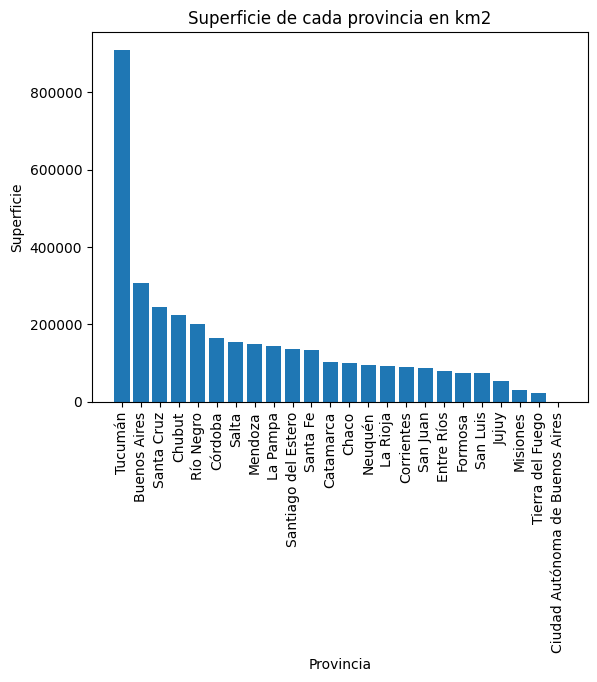

In [32]:
#Ordenamos los valores.
prov_sorted = prov.sort_values('superficie_km2', ascending=False)

plt.bar(prov_sorted.index, prov_sorted['superficie_km2'])
plt.xlabel('Provincia')
plt.ylabel('Superficie')
plt.title('Superficie de cada provincia en km2')
plt.xticks(rotation=90)
plt.show()

Claramente podemos observar que el dato de la superficie de Tucuman es erroneo. Esto puede ser debido a un error de tipeo o una confusión. Al ser un dato del que podemos saber la informacion correcta, investigamos y basandonos en https://www.argentina.gob.ar/tucuman concluimos que la superficie es de 22.524 km² y la reemplazamos en nuestro dataframe.

In [33]:
prov.loc['Tucumán','superficie_km2'] = 22524

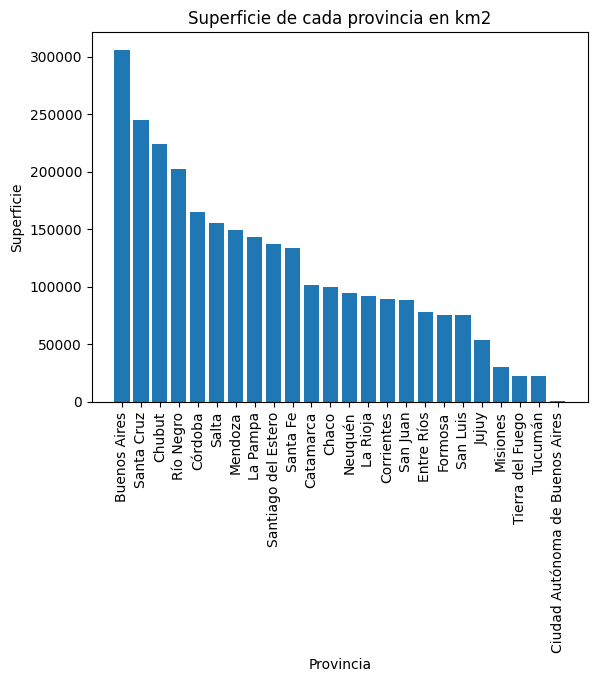

In [34]:
#Ordenamos los valores nuevamente ya que corregimos el valor erroneo.
prov_sorted = prov.sort_values('superficie_km2', ascending=False)

plt.bar(prov_sorted.index, prov_sorted['superficie_km2'])
plt.xlabel('Provincia')
plt.ylabel('Superficie')
plt.title('Superficie de cada provincia en km2')
plt.xticks(rotation=90)
plt.show()

Ahora si, podemos observar que varia bastante la superfice entre las provincias. La provincia con mayor superfice por bastante diferencia es **Buenos Aires** y la de menor superficie la tiene la **Ciudad Autónoma de Buenos Aires**



Ahora bien, una vez concluido el análisis de cada variable procederemos a investigar la relación que hay entre cada una de ellas.

Comenzaremos haciendo la matriz de covarianza, la misma nos indicará si hay una relación entre las variables.

In [35]:
prov_cov = prov.cov()

In [36]:
prov_cov

,poblacion,hogares,ingresos_laborales_miles_pesos,tasa_de_empleo_%,superficie_km2,exportaciones_mill_usd
poblacion,1.308446e+13,1.100918e+12,2.998063e+14,1.164772e+06,1.548664e+11,1.522433e+10
hogares,1.100918e+12,1.971975e+12,7.877574e+13,8.358980e+05,3.803419e+10,4.497178e+09
ingresos_laborales_miles_pesos,2.998063e+14,7.877574e+13,1.646526e+16,1.044500e+08,4.089476e+12,8.046001e+11
tasa_de_empleo_%,1.164772e+06,8.358980e+05,1.044500e+08,2.874764e+00,4.842307e+04,4.244776e+03
superficie_km2,1.548664e+11,3.803419e+10,4.089476e+12,4.842307e+04,5.573281e+09,3.274733e+08
exportaciones_mill_usd,1.522433e+10,4.497178e+09,8.046001e+11,4.244776e+03,3.274733e+08,5.844194e+07


Observando la matriz podemos notar algunas relaciones lineales entre las variables.

Por ejemplo, podemos notar hay una relacion fuerte y positiva entre las variables `ingresos_laborales_miles_pesos` y `hogares` .

Ahora, haremos la matriz de correlación.

In [37]:
prov_corr = prov.corr()

In [38]:
prov_corr

,poblacion,hogares,ingresos_laborales_miles_pesos,tasa_de_empleo_%,superficie_km2,exportaciones_mill_usd
poblacion,1.000000,0.216734,0.645920,0.189916,0.573487,0.550552
hogares,0.216734,1.000000,0.437177,0.351076,0.362801,0.418916
ingresos_laborales_miles_pesos,0.645920,0.437177,1.000000,0.480090,0.426902,0.820226
tasa_de_empleo_%,0.189916,0.351076,0.480090,1.000000,0.382557,0.327485
superficie_km2,0.573487,0.362801,0.426902,0.382557,1.000000,0.573797
exportaciones_mill_usd,0.550552,0.418916,0.820226,0.327485,0.573797,1.000000


Observando la matriz podemos notar mas detalladamente algunas relaciones.

Volviendo al ejemplo mencionado anteriormente, podemos notar que el valor que hay entre las variables `ingresos_laborales_miles_pesos` y `hogares` es mas cercano a 0 que a 1 por lo que no hay una relación tan clara.

Una de las mayores relaciones que se pueden notar es de la variable `ingresos_laborales_miles_pesos` y `poblacion`


Graficamos la matriz de correlación para podes vizualisar mejor las relacionas.

Utilizamos la libreria `seaborn`

<Axes: >

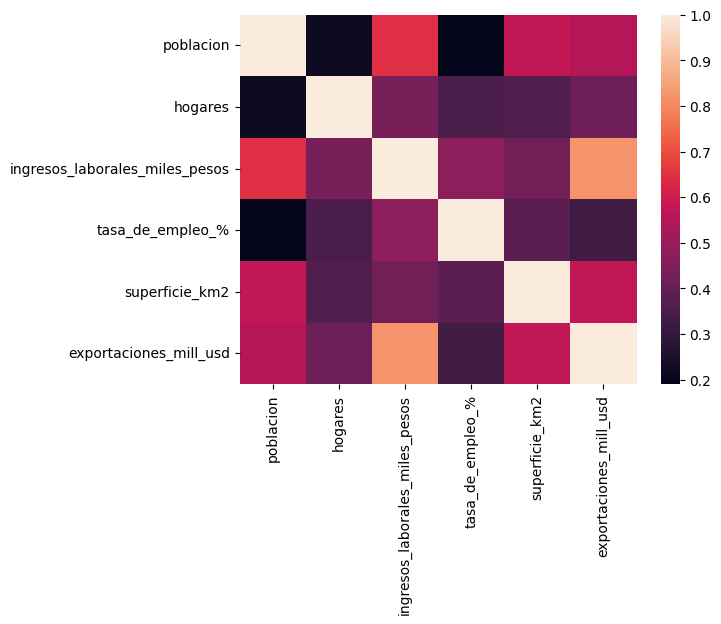

In [39]:
sns.heatmap(prov_corr, annot=False)

Tomaremos las varibles `hogares` , `poblacion` y `superficie_km2` y haremos un análisis sobre las mismas.




Sin visualizar graficamente las varibles, nosotros planteamos las siguientes hipótesis:

*   Mientras mas **poblacion** mas **hogares**.
*   Mientras mas **superficie** mas **hogares**.
*   Mientras mas **superficie** mas **poblacion**.

Veremos a traves de graficos, si estas relaciones se cumplen.


Comenzaremos analizando `poblacion` y `hogares`.

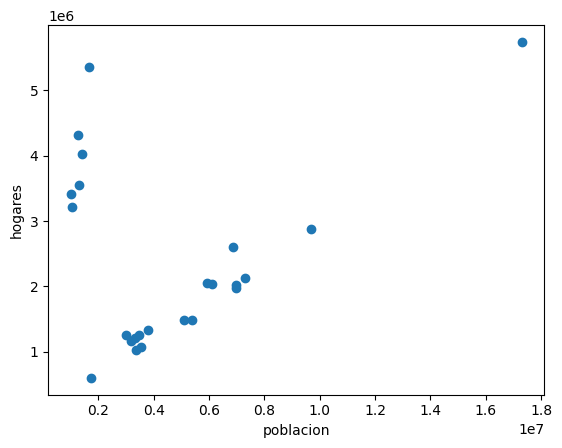

In [40]:
plt.scatter( prov['poblacion'], prov['hogares'])

plt.xlabel('poblacion')
plt.ylabel('hogares')

plt.show()

Podemos notar que hay una cierta relación entre las variables. La relación no es tan marcada como nosotros creiamos, pero en la mayoria de los casos podemos observar que se cumple lo que plantemos.

Analizamos `superficie` y `hogares`

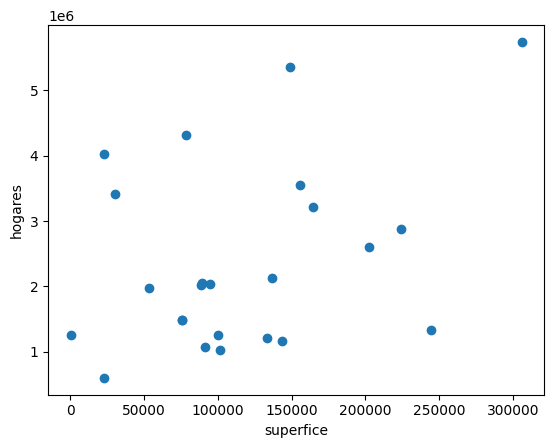

In [41]:
plt.scatter(prov['superficie_km2'], prov['hogares'])

plt.xlabel('superfice')
plt.ylabel('hogares')

plt.show()

Podemos notar que no hay una cierta relación entre las variables. Si bien en alguna provincia se debe cumplir nuestra hipótesis, no sucede en la mayoria.

Por ulitmo analizamos `superficie` y `poblacion`

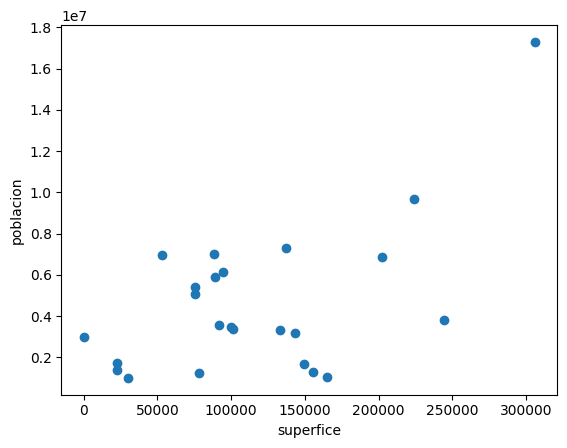

In [42]:
plt.scatter(prov['superficie_km2'], prov['poblacion'])

plt.xlabel('superfice')
plt.ylabel('poblacion')

plt.show()

Podemos notar que no hay una cierta relación entre las variables. Si bien en alguna provincia se debe cumplir nuestra hipótesis, no sucede en la mayoria.

# **Conclusión:**

Nuestra conclusión acerca de lo planteado anteriormente sobre las variables `hogares` , `poblacion` y `superficie_km2` es que la unica relación clara que podemos notar es entre `hogares` y `poblacion`. Esto tiene sentido, ya que Argentina es un pais con mucha cosecha, muchos espacios verdes, desiertos, montañas y no necesarimente la superficie de la provincia va a estar relacionada a la cantidad de hogares ni la cantidad de poblacion de la misma. Si bien es cierto que hay provincias en las cuales se cumplen las 3 hipotesis planteadas anteriormente por nosotros, en la mayoria no se van a cumplir las 3 en simultaneo.

En el gráfico realizado anteriormente entre `hogares` y `poblacion` podiamos notar que si bien en la mayoria de casos se cumplia lo planteado, habia algunos casos en los que no. En estos caso, entra en juego la cantidad de personas que viven en un hogar. Si tuvieramos una variable que nos indique cual es el promedio de personas que viven en un hogar por provincia podriamos realizar un análisis mas completo.

Código en donde convertimos los DF en formato parquet.

In [43]:
#prov.to_parquet('prov_parquet')